# Graph Mining Part I

- structure: node(vertex; entity), edge(link; relation; predicate), attribute
- input data: edgelist/adjacency matrix
- network 종류
  - directed v.s. undirected: 방향성의 여부
  - weighted v.s. unweighted: edge의 weight
  - multi-relational: relation type의 개수 (`nx.MultiGraph()`, `nx.MultiDiGraph()`)
  - bipartite graph (이분 그래프): 정점을 2그룹으로 나눌 수 있으되 같은 그룹의 정점끼리는 간선으로 이어지지 않은 경우
    - 학생 - 수업: 학생들이 어떤 수업을 듣고 있는지
    - 유저 - 선호 영화: 각 유저가 어떠한 영화를 선호하는지
    - 구직자 - 선호 회사: 각 구직자가 어떠한 회사를 선호하는지

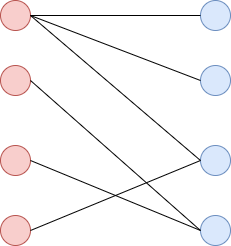

- Software: [Gephi](https://gephi.org/), [Ucinet](https://sites.google.com/site/ucinetsoftware/home), R (igraph), Python (networkx), nodeXL

# Step 1. Graph
- `networkx`를 통해 다양한 유형의 네트워크를 생성할 수 있음
  - `nx.Graph()`: undirected graph
  - `nx.DiGraph()`: directed graph

## 1) From Scratch (Edgelist)

In [1]:
Fruits = ['apple', 'banana', 'kiwi', 'mango']
relations = [('apple', 'banana'), ('kiwi', 'apple'), ('mango', 'apple'), ('mango', 'banana')]

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Graph 생성
G = nx.Graph() #DiGraph, MultiGraph....

# Node (vertex) 생성
G.add_nodes_from(Fruits)

# Edge (link) 생성
G.add_edges_from(relations)  # graph에 속한 모든 node들이 edgelist에 포함된 경우 add_nodes_from() 과정을 생략할 수 있음

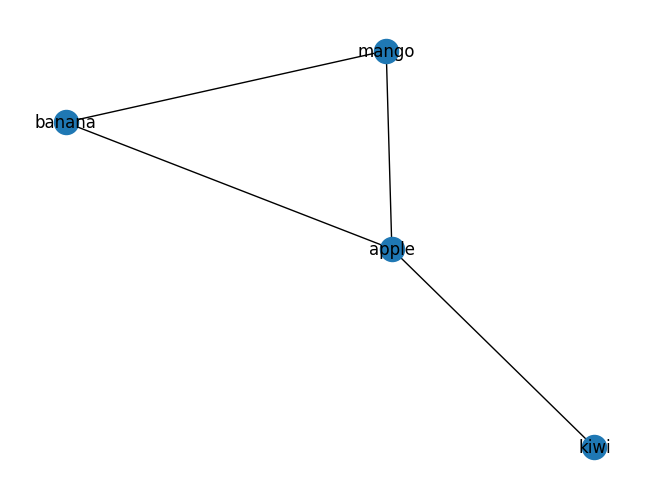

In [3]:
nx.draw(G, with_labels=True)
plt.show()

In [4]:
G.edges
G.nodes

NodeView(('apple', 'banana', 'kiwi', 'mango'))

In [5]:
print('Nodes:', G.nodes)
print('Number of nodes:', nx.number_of_nodes(G))
print('Edges:', G.edges)
print('Number of nodes:', nx.number_of_edges(G))

Nodes: ['apple', 'banana', 'kiwi', 'mango']
Number of nodes: 4
Edges: [('apple', 'banana'), ('apple', 'kiwi'), ('apple', 'mango'), ('banana', 'mango')]
Number of nodes: 4


In [6]:
print(G)

Graph with 4 nodes and 4 edges


- degree: node와 연결된 모든 edge의 수

In [7]:
degree = nx.degree(G)
print(degree)

[('apple', 3), ('banana', 2), ('kiwi', 1), ('mango', 2)]


In [8]:
print(list(G.neighbors('banana')))

['apple', 'mango']


- Directed graph의 경우 다음과 같이 생성 가능

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# 방향이 있는 네트워크 생성
G_directed = nx.DiGraph()

G_directed.add_nodes_from(Fruits)
G_directed.add_edges_from(relations)

In [10]:
in_degree = G_directed.in_degree()
out_degree = G_directed.out_degree()
print('in-degree:', in_degree)
print('out-degree:', out_degree)

in-degree: [('apple', 2), ('banana', 2), ('kiwi', 0), ('mango', 0)]
out-degree: [('apple', 1), ('banana', 0), ('kiwi', 1), ('mango', 2)]


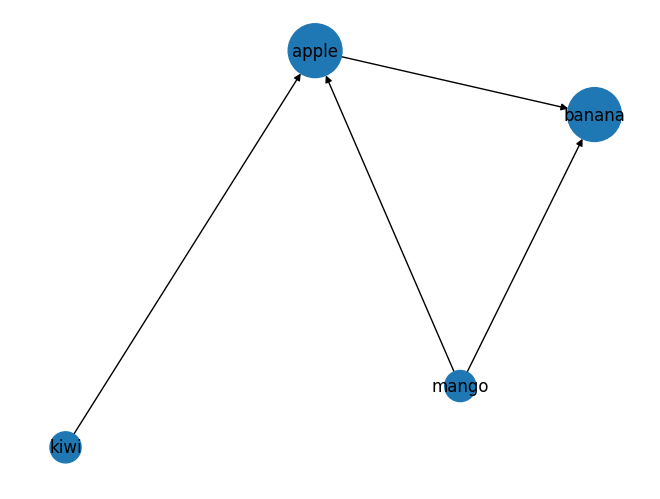

In [11]:
# 시각화 (degree가 클수록 원의 크기도 크도록)
nx.draw(G_directed,
        node_size=[500 + v[1]*500 for v in in_degree],
        with_labels=True) #노드 이름

## 2) From Scratch (Adjacency matrix)

In [12]:
# Adjacency matrix
A = nx.to_numpy_array(G)
print(A)

[[0. 1. 1. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]]


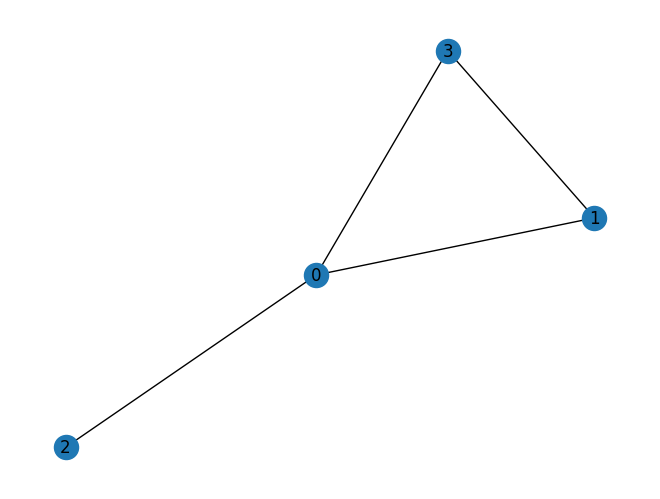

{0: 'apple', 1: 'banana', 2: 'kiwi', 3: 'mango'}


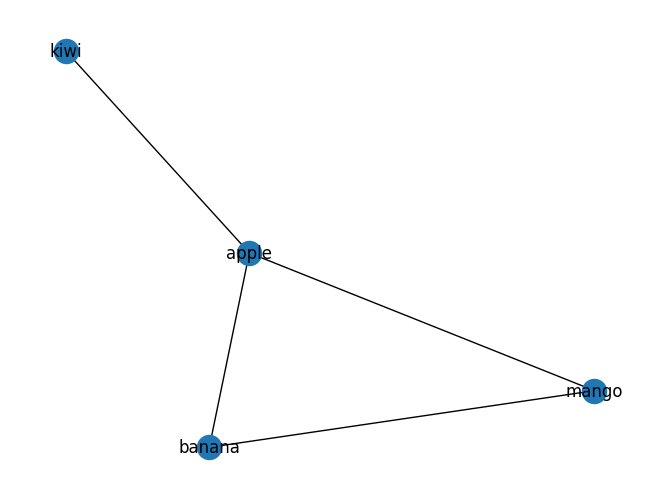

In [13]:
G_Adjacency=nx.from_numpy_array(A) # node label이 지정되지 않은 상태 (0, 1, 2, ...)
nx.draw(G_Adjacency, with_labels=True)
plt.show()

mapping = {i: f for i, f in enumerate(Fruits)}
print(mapping) # 변경할 label 형태

H = nx.relabel_nodes(G_Adjacency, mapping)
nx.draw(H, with_labels=True)
plt.show()

## 3) From Dataset

In [14]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
G_data = nx.read_edgelist('facebook_combined.txt', delimiter=" ")
print(G_data)

Graph with 4039 nodes and 88234 edges


In [16]:
# cora.cites로 그래프 GG
# '\t'  #탭 문자
GG = nx.read_edgelist('cora.cites', delimiter="\t")
print(GG)

Graph with 2708 nodes and 5278 edges


In [17]:
G_data.edges

EdgeView([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('0', '6'), ('0', '7'), ('0', '8'), ('0', '9'), ('0', '10'), ('0', '11'), ('0', '12'), ('0', '13'), ('0', '14'), ('0', '15'), ('0', '16'), ('0', '17'), ('0', '18'), ('0', '19'), ('0', '20'), ('0', '21'), ('0', '22'), ('0', '23'), ('0', '24'), ('0', '25'), ('0', '26'), ('0', '27'), ('0', '28'), ('0', '29'), ('0', '30'), ('0', '31'), ('0', '32'), ('0', '33'), ('0', '34'), ('0', '35'), ('0', '36'), ('0', '37'), ('0', '38'), ('0', '39'), ('0', '40'), ('0', '41'), ('0', '42'), ('0', '43'), ('0', '44'), ('0', '45'), ('0', '46'), ('0', '47'), ('0', '48'), ('0', '49'), ('0', '50'), ('0', '51'), ('0', '52'), ('0', '53'), ('0', '54'), ('0', '55'), ('0', '56'), ('0', '57'), ('0', '58'), ('0', '59'), ('0', '60'), ('0', '61'), ('0', '62'), ('0', '63'), ('0', '64'), ('0', '65'), ('0', '66'), ('0', '67'), ('0', '68'), ('0', '69'), ('0', '70'), ('0', '71'), ('0', '72'), ('0', '73'), ('0', '74'), ('0', '75'), ('0', '76'), ('0', '77')

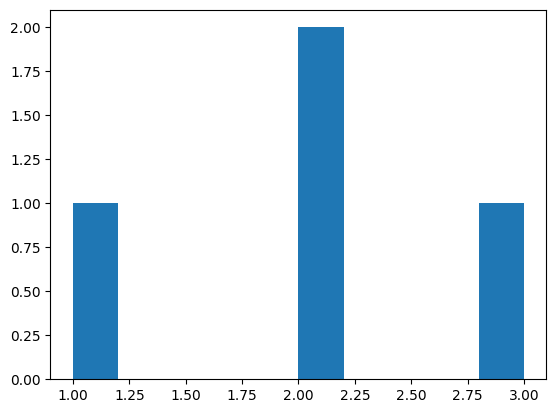

In [18]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dict(degree).values())
plt.show()

# Step 2. Attribute

## Edge attribute (weight)

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

Fruits = ['apple', 'banana', 'kiwi', 'mango']
G_weighted = nx.Graph()
G_weighted.add_nodes_from(Fruits)

In [20]:
# Case 1
weighted_relations = [('apple', 'banana', {'weight': 7}), ('kiwi', 'apple', {'weight': 4}), ('mango', 'apple', {'weight': 3}), ('mango', 'banana', {'weight': 5})]
G_weighted.add_edges_from(weighted_relations)
print(G_weighted.edges(data=True))

[('apple', 'banana', {'weight': 7}), ('apple', 'kiwi', {'weight': 4}), ('apple', 'mango', {'weight': 3}), ('banana', 'mango', {'weight': 5})]


In [21]:
# Case 2
G_weighted['apple']['banana']['weight']=5
G_weighted['apple']['kiwi']['weight']=2
G_weighted['apple']['mango']['weight']=3
G_weighted['banana']['mango']['weight']=4
print(G_weighted.edges(data=True))

[('apple', 'banana', {'weight': 5}), ('apple', 'kiwi', {'weight': 2}), ('apple', 'mango', {'weight': 3}), ('banana', 'mango', {'weight': 4})]


In [22]:
nx.to_numpy_array(G_weighted)

array([[0., 5., 2., 3.],
       [5., 0., 0., 4.],
       [2., 0., 0., 0.],
       [3., 4., 0., 0.]])

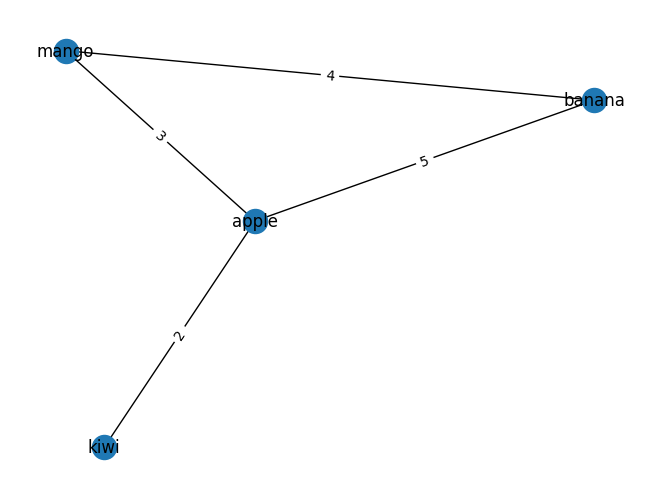

In [23]:
labels = nx.get_edge_attributes(G_weighted, 'weight')

pos = nx.spring_layout(G_weighted)
nx.draw(G_weighted, pos, with_labels=True)
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=labels)

plt.show()

In [24]:
print('전체 shortest path:\n',nx.shortest_path(G_weighted))
print('banana to kiwi:',nx.shortest_path(G_weighted, 'banana', 'kiwi'))
# print('banana to kiwi:',nx.shortest_path(G_weighted, 'banana', 'kiwi', weight='weight')) # 여러 route가 있을 때 weight을 고려하여 shortest path 계산

전체 shortest path:
 {'apple': {'apple': ['apple'], 'banana': ['apple', 'banana'], 'kiwi': ['apple', 'kiwi'], 'mango': ['apple', 'mango']}, 'banana': {'banana': ['banana'], 'apple': ['banana', 'apple'], 'mango': ['banana', 'mango'], 'kiwi': ['banana', 'apple', 'kiwi']}, 'kiwi': {'kiwi': ['kiwi'], 'apple': ['kiwi', 'apple'], 'banana': ['kiwi', 'apple', 'banana'], 'mango': ['kiwi', 'apple', 'mango']}, 'mango': {'mango': ['mango'], 'apple': ['mango', 'apple'], 'banana': ['mango', 'banana'], 'kiwi': ['mango', 'apple', 'kiwi']}}
banana to kiwi: ['banana', 'apple', 'kiwi']


# Step 3. Graph Metric

## 1) Structure
- diameter: 네트워크에서 가장 멀리 연결된 pair의 거리
  - 모든 노드 쌍에 대해 Shortest Path를 계산 후, 그 중 가장 큰 값을 가지는 Path의 길이
- density: 모든 edge의 개수와 실제 edge 수(k)의 비
  - undirected: $k/n(n-1)/2$
  - directed: $k/n(n-1)$
- reciprocity: 주고 받는 비율 (i.e., A가 B를 친구로 지명하였을 때, B가 A를 친구로 지명)
  - directed graph에서만 의미가 있음
- transitivity: 3 이상의 관계에서 연결된 비율 (i.e., A가 B를 친구로 지명하고, B는 C를 친구로 지명했을 때, A가 C를 친구로 지명)


In [25]:
print('diamter:', nx.diameter(G_data))
print('density:', nx.density(G_data))
print('transitivity:', nx.transitivity(G_data))
print('reciprocity:', nx.reciprocity(G_data))

diamter: 8
density: 0.010819963503439287
transitivity: 0.5191742775433075
reciprocity: 0.0


## 2) Centrality
- Degree centrality (연결 중심성): 마당발이 누구인가? 누가 직접적 이웃이 가장 많은가?
  - Normalized degree centrality: 표준화를 위해 전체를 N-1로 나눠줌
- Betweenness centrality (매개 중심성): 얼마나 많은 최단 경로가 특정 노드를 지나는가?
  - Broker 역할을 하는 node를 찾을 수 있음
  - $C_B(i)=\sum_{j<k}g_{jk}(i)/g_{jk}$ where $g_{jk}$: jk를 연결하는 geodesics 수, 그 중 $g_{jk}(i)$: node i가 포함되어있는 경우
  - Normalized betweeness centrality: $C_B^*(i)=\frac{C_B(i)}{\frac{(N-1)(N-2)}{2}}$
- Closeness centrality (근접 중심성): 누가 다른 노드들에 대한 최단거리를 가지는가? (다른 노드들에 가장 빨리 정보를 확산시킬 수 있는가?)
  - 모든 다른 노드들과의 거리가 가장 가까운 노드가 중요한 노드
  - $C_C(i)=[\sum_{j=1}^{N-1}d(i,j)]^{-1}$
  - Normalized closness centrality: $C_C^*(i)=(N-1)C_C(i)$
- Eigenvector centrality (Bonacich power centrality): 누가 중요한 노드들과 연결이 많이 되어 있는가?
  - 연결된 이웃의 중요도에 가중치를 부여
  - $C_E(v_i) \propto\sum_{v_j \in N_i}A_{ij}C_E(v_j)$, $A\mathbf{x}=\lambda \mathbf{x}$
- 이 외에 Katz centrality, PageRank [참고](https://bab2min.tistory.com/554)


In [26]:
G2 = nx.read_edgelist( "cora.cites", create_using=nx.DiGraph(), nodetype=int)

In [27]:
print('degree centrality:\n', nx.degree_centrality(G2))
print('betweenness centrality:\n', nx.betweenness_centrality(G2))
print('closeness centrality:\n', nx.closeness_centrality(G2))
print('eigenvector centrality:\n', nx.eigenvector_centrality(G2))

degree centrality:
 {35: 0.06243073513114149, 1033: 0.001847063169560399, 103482: 0.0022164758034724785, 103515: 0.004063538973032878, 1050679: 0.0014776505356483192, 1103960: 0.001847063169560399, 1103985: 0.0007388252678241596, 1109199: 0.0011082379017362393, 1112911: 0.0014776505356483192, 1113438: 0.001847063169560399, 1113831: 0.0011082379017362393, 1114331: 0.001847063169560399, 1117476: 0.0011082379017362393, 1119505: 0.0007388252678241596, 1119708: 0.001847063169560399, 1120431: 0.0014776505356483192, 1123756: 0.0014776505356483192, 1125386: 0.0014776505356483192, 1127430: 0.0007388252678241596, 1127913: 0.0014776505356483192, 1128204: 0.0007388252678241596, 1128227: 0.0014776505356483192, 1128314: 0.0011082379017362393, 1128453: 0.0014776505356483192, 1128945: 0.0003694126339120798, 1128959: 0.0007388252678241596, 1128985: 0.0014776505356483192, 1129018: 0.0007388252678241596, 1129027: 0.0007388252678241596, 1129573: 0.0011082379017362393, 1129683: 0.001847063169560399, 112977

In [28]:
deg_cen = nx.degree_centrality(G_data)
bet_cen = nx.betweenness_centrality(G_data)
clo_cen = nx.closeness_centrality(G_data)
eig_cen = nx.eigenvector_centrality(G_data)

In [29]:
# 각 centrality별 가장 값이 높은 3개의 node 추출
print('degree centrality:\n', sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('betweenness centrality:\n', sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('closeness centrality:\n', sorted(clo_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('eigenvector centrality:\n', sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)[0:3])

degree centrality:
 [('107', 0.258791480931154), ('1684', 0.1961367013372957), ('1912', 0.18697374938088163)]
betweenness centrality:
 [('107', 0.4805180785560152), ('1684', 0.3377974497301992), ('3437', 0.23611535735892905)]
closeness centrality:
 [('107', 0.45969945355191255), ('58', 0.3974018305284913), ('428', 0.3948371956585509)]
eigenvector centrality:
 [('1912', 0.09540696149067629), ('2266', 0.08698327767886552), ('2206', 0.08605239270584342)]


# Step 4. Graph Analysis

## 1) Link Prediction
- 노드 간 missing/latent link 예측
  - 구조적 유사성 지표를 통해 두 노드 간 유사한 정보를 기반으로 예측
- [indices](https://medium.com/neo4j/link-prediction-with-neo4j-part-1-an-introduction-713aa779fd9): Common Neighbors, Adamic Adar, Preferential Attachment, Katz 등 [networkx](https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html)에서 일부 link prediction metrics 제공

In [30]:
G2 = nx.read_edgelist( "cora.cites", nodetype=int)
common_neighbor = [(e[0], e[1], len(list(nx.common_neighbors(G2, e[0], e[1])))) for e in nx.non_edges(G2)]
common_neighbor.sort(key=lambda x: x[-1], reverse=True)
common_neighbor[:10]

[(114, 6213, 20),
 (1365, 19621, 12),
 (1365, 3229, 11),
 (230879, 2665, 11),
 (12576, 56115, 10),
 (35, 14062, 7),
 (114, 4584, 7),
 (114, 6214, 7),
 (1365, 4584, 7),
 (114, 117, 6)]

In [31]:
'''
공통 이웃이 많은 경우 더 연결될 가능성이 높음
'''
common_neighbor = nx.common_neighbor_centrality(G2)
common_neighbor = list(common_neighbor)
common_neighbor.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in common_neighbor[:10]:
    print(f"({u}, {v}) -> {p}")

(114, 6213) -> 286.79999999999995
(1365, 19621) -> 280.4
(1365, 3229) -> 279.59999999999997
(230879, 2665) -> 279.59999999999997
(12576, 56115) -> 278.79999999999995
(35, 14062) -> 276.4
(114, 4584) -> 276.4
(114, 6214) -> 276.4
(1365, 4584) -> 276.4
(114, 117) -> 275.59999999999997


In [32]:
'''
노드가 공통 이웃을 통해 다른 노드에 보낼 수 있는 정보를 기반으로 측정
'''
aa = nx.adamic_adar_index(G2)
aa = list(aa)
aa.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in aa[:10]:
    print(f"({u}, {v}) -> {p}")

(114, 6213) -> 12.135810271097586
(1365, 3229) -> 10.97941357536982
(1365, 19621) -> 10.05061687685061
(230879, 2665) -> 6.849705281884632
(12576, 56115) -> 6.128741696976914
(1365, 4584) -> 5.948538404150826
(38205, 57119) -> 5.759646697968469
(27623, 27627) -> 4.872083856277795
(35, 14062) -> 4.872083856277794
(1272, 10169) -> 4.516976828849246


In [33]:
'''
degree가 높은 노드들이 결국은 연결될 것이라는 관점
'''
pa = nx.preferential_attachment(G2)
pa = list(pa)
pa.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in pa[:10]:
    print(f"({u}, {v}) -> {p}")

(35, 6213) -> 13104
(35, 1365) -> 12432
(35, 3229) -> 10920
(35, 910) -> 7392
(35, 114) -> 7056
(35, 4330) -> 6720
(35, 3231) -> 6048
(1365, 6213) -> 5772
(35, 1272) -> 5712
(35, 19621) -> 5544


## 2) Community Detection

- 연결 밀도가 높은 집단끼리 묶어서 분석
  - community: modularity가 높은 집단
  - [modularity]((https://mons1220.tistory.com/93)): 커뮤니티 내부에 펼쳐져 있는 링크들이 무작위적인 연결들과 비교했을 때 얼마나 더 많은지 정량화한 지표
- algorithm: [Louvain algorithm](https://lsjsj92.tistory.com/587)
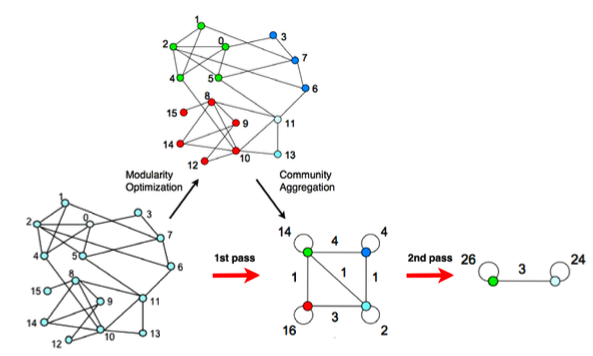
- (https://towardsdatascience.com/louvains-algorithm-for-community-detection-in-python-95ff7f675306)

<ipython-input-34-c9d064c8e3bb>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


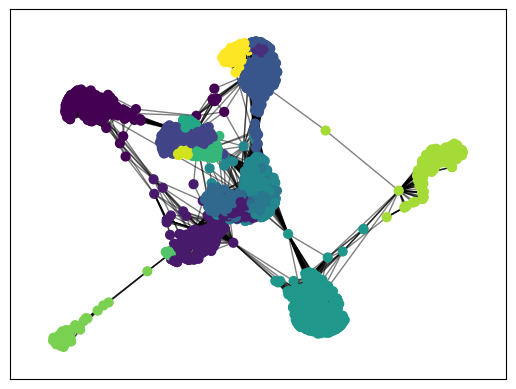

In [34]:
import community.community_louvain as cl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

partition = cl.best_partition(G_data)

pos = nx.spring_layout(G_data)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_data, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_data, pos, alpha=0.5)
plt.show()

# Step 5. Application

In [35]:
G = nx.read_edgelist( "facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

In [36]:
print(G)

Graph with 4039 nodes and 88234 edges


In [ ]:
#nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels=False, node_size=20)

In [39]:
edges = pd.read_csv('rec-movielens-user-movies-10m.edges', sep=" ")

In [40]:
edges.columns =["source", "target","time"]

In [41]:
G = nx.from_pandas_edgelist(edges, source='source', target='target')

# Graph Mining II

# 1. 그래프 리뷰


In [42]:
!pip install karateclub
!pip install node2vec
!pip install --upgrade networkx==2.8.7
!pip install --upgrade pillow
!pip install matplotlib==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 100.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.7 MB/s eta 0:00:00
  Created wheel for karateclub: filename=karateclub-1.3.3-py3-none-any.whl size=101982 sha256=365e2e98cd116dd122a0f110cf2135263d5da2940556481d9a66e3ee3f1b1a68
  Stored in directory: /root/.cache/pip/wheels/62/bd/af/17e7ca6ba0ed144d22502780f5c0660a8e4985939dc6973a81
Successfully built karateclub
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
karateclub 1.3.3 requires networkx<2.7, but you have networkx 2.8.7 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 37.2 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.
plotnine 0.12.4 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 78.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
plotnine 0.12.4 requires matplotlib>=3.6.0, but you have matplotlib 3.5.1 which is incompatible.
plotnine 0.12.4 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.


In [43]:
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)

    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)

    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)


    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)

        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)

    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:305: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


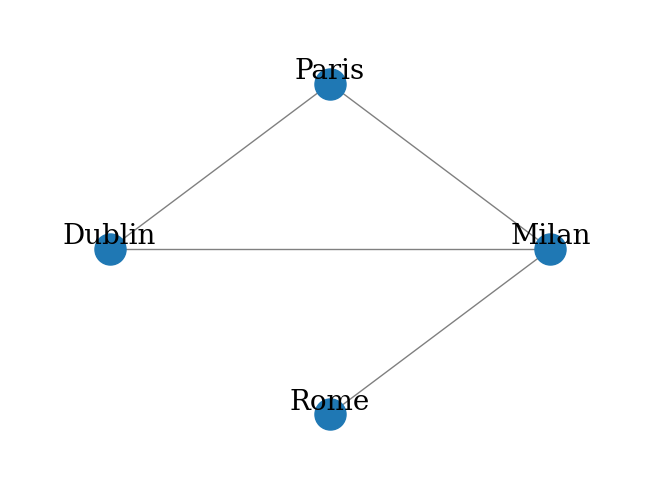

In [44]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Paris'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [45]:
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Rome', 'Milan', 'Paris']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Rome', 'Milan'), ('Milan', 'Paris')]


In [46]:
{G.degree(v): v for v in G.nodes}

{2: 'Paris', 1: 'Rome', 3: 'Milan'}

In [47]:
print(f"Graph Order: {G.number_of_nodes()}")
print(f"Graph Size: {G.number_of_edges()}")
print(f"Degree for nodes: { {v: G.degree(v) for v in G.nodes} }")
print(f"Neighbors for nodes: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Graph Order: 4
Graph Size: 4
Degree for nodes: {'Dublin': 2, 'Rome': 1, 'Milan': 3, 'Paris': 2}
Neighbors for nodes: {'Dublin': ['Milan', 'Paris'], 'Rome': ['Milan'], 'Milan': ['Dublin', 'Paris', 'Rome'], 'Paris': ['Milan', 'Dublin']}


In [48]:
ego_graph_milan = nx.ego_graph(G, "Milan")
print(f"Nodes: {ego_graph_milan.nodes}")
print(f"Edges: {ego_graph_milan.edges}")

Nodes: ['Dublin', 'Rome', 'Milan', 'Paris']
Edges: [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Rome', 'Milan'), ('Milan', 'Paris')]


In [49]:
new_nodes = {'London', 'Madrid'}
new_edges = [('London','Rome'), ('Madrid','Paris')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Rome', 'Milan', 'Paris', 'London', 'Madrid']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Rome', 'Milan'), ('Rome', 'London'), ('Milan', 'Paris'), ('Paris', 'Madrid')]


In [50]:
node_remove = {'London', 'Madrid'}
G.remove_nodes_from(node_remove)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Rome', 'Milan', 'Paris']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Rome', 'Milan'), ('Milan', 'Paris')]


In [51]:
node_edges = [('Milan','Dublin'), ('Milan','Paris')]
G.remove_edges_from(node_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Rome', 'Milan', 'Paris']
E = [('Dublin', 'Paris'), ('Rome', 'Milan')]


In [52]:
print(nx.to_edgelist(G))

[('Dublin', 'Paris', {}), ('Rome', 'Milan', {})]


In [53]:
print(nx.to_pandas_adjacency(G))

        Dublin  Rome  Milan  Paris
Dublin     0.0   0.0    0.0    1.0
Rome       0.0   0.0    1.0    0.0
Milan      0.0   1.0    0.0    0.0
Paris      1.0   0.0    0.0    0.0


- Directed Graph

In [54]:
import networkx as nx
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

  source  target
0  Milan  Dublin
1  Milan    Rome
2  Paris   Milan
3  Paris  Dublin
        Dublin  Rome  Milan  Paris
Dublin     0.0   0.0    0.0    0.0
Rome       0.0   0.0    0.0    0.0
Milan      1.0   1.0    0.0    0.0
Paris      1.0   0.0    1.0    0.0


In [55]:
print(f"Indegree for nodes: { {v: G.in_degree(v) for v in G.nodes} }")
print(f"Outegree for nodes: { {v: G.out_degree(v) for v in G.nodes} }")

Indegree for nodes: {'Dublin': 2, 'Rome': 1, 'Milan': 1, 'Paris': 0}
Outegree for nodes: {'Dublin': 0, 'Rome': 0, 'Milan': 2, 'Paris': 2}


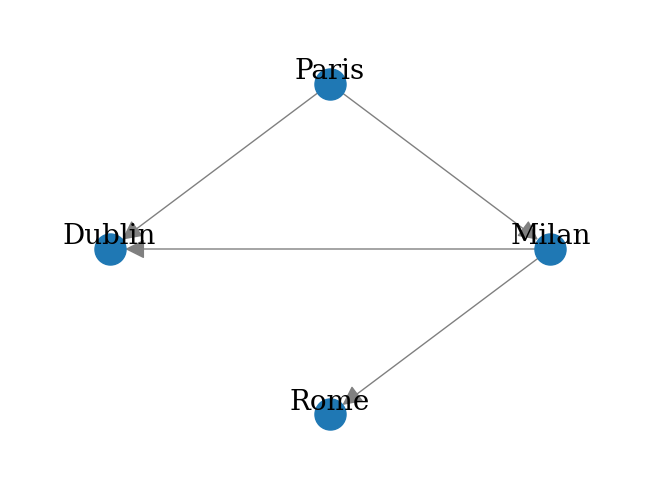

In [56]:
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

- Weighted Directed Graph

  source  target  weight
0  Milan    Rome       5
1  Milan  Dublin      19
2  Paris  Dublin      11
3  Paris   Milan       8
        Dublin  Rome  Milan  Paris
Dublin     0.0   0.0    0.0    0.0
Rome       0.0   0.0    0.0    0.0
Milan     19.0   5.0    0.0    0.0
Paris     11.0   0.0    8.0    0.0


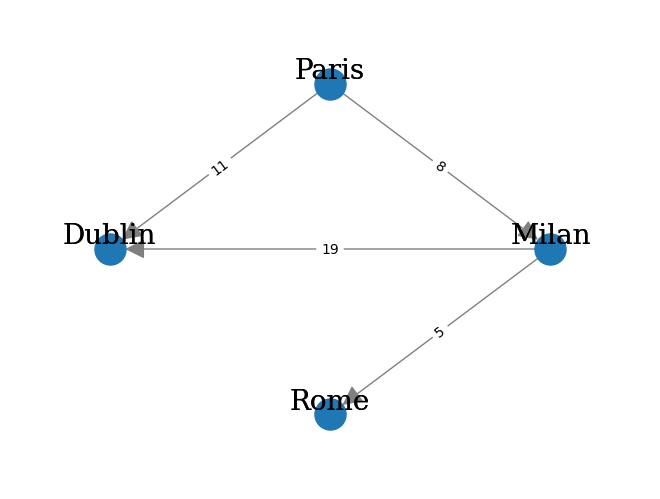

In [57]:
import networkx as nx
G = nx.MultiDiGraph()
V = {'Paris', 'Dublin','Milan', 'Rome'}
E = [ ('Paris','Dublin', 11), ('Paris','Milan', 8),
     ('Milan','Rome', 5),('Milan','Dublin', 19)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500, plot_weight=True)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

- Bipartite Graph

In [58]:
n_nodes = 10
n_edges = 12
bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 ==0]
top_nodes = [ith for ith in range(n_nodes) if ith % 2 ==1]
iter_edges = zip(
    np.random.choice(bottom_nodes, n_edges),
    np.random.choice(top_nodes, n_edges))
edges = pd.DataFrame([
    {"source": a, "target": b} for a, b in iter_edges])
B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from([tuple(x) for x in edges.values])

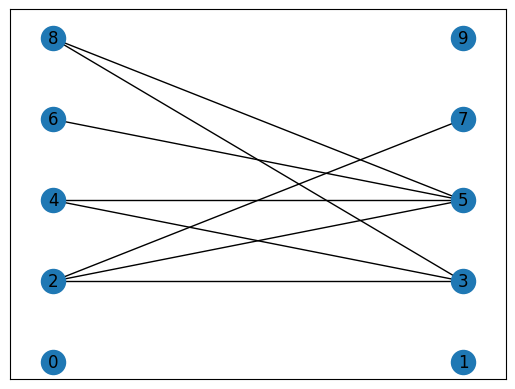

In [59]:
from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos=pos)

- Multi Graph

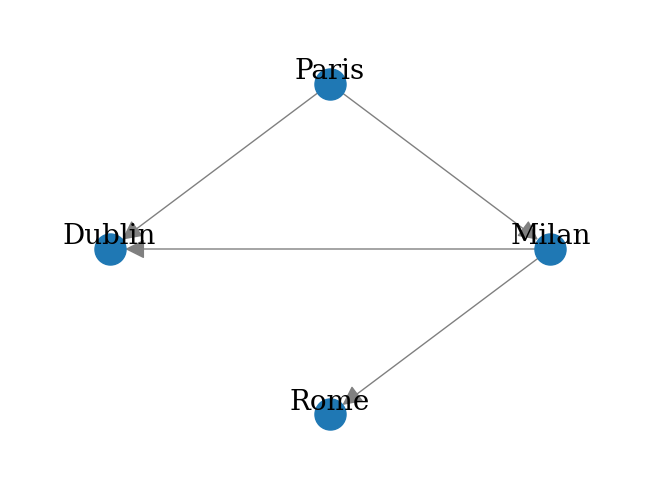

In [60]:
import networkx as nx
directed_multi_graph = nx.MultiDiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome'), ('Milan','Rome')]
directed_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)

draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [61]:
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

In [62]:
# draw a simple graph
def draw_graph(G, node_names={}, filename=None, node_size=50):
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')

    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)

    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')

    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

    if filename:
        plt.savefig(filename, format="png")


# draw enhanced path on the graph
def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G)

    plt.figure(figsize=(5,5),dpi=300)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')

    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)

    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)

    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

    if filename:
        plt.savefig(filename, format="png")

# 2. Shortest path

In [63]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [64]:
path = nx.shortest_path(G,source=1,target=7)
print(path)

[1, 3, 4, 5, 7]


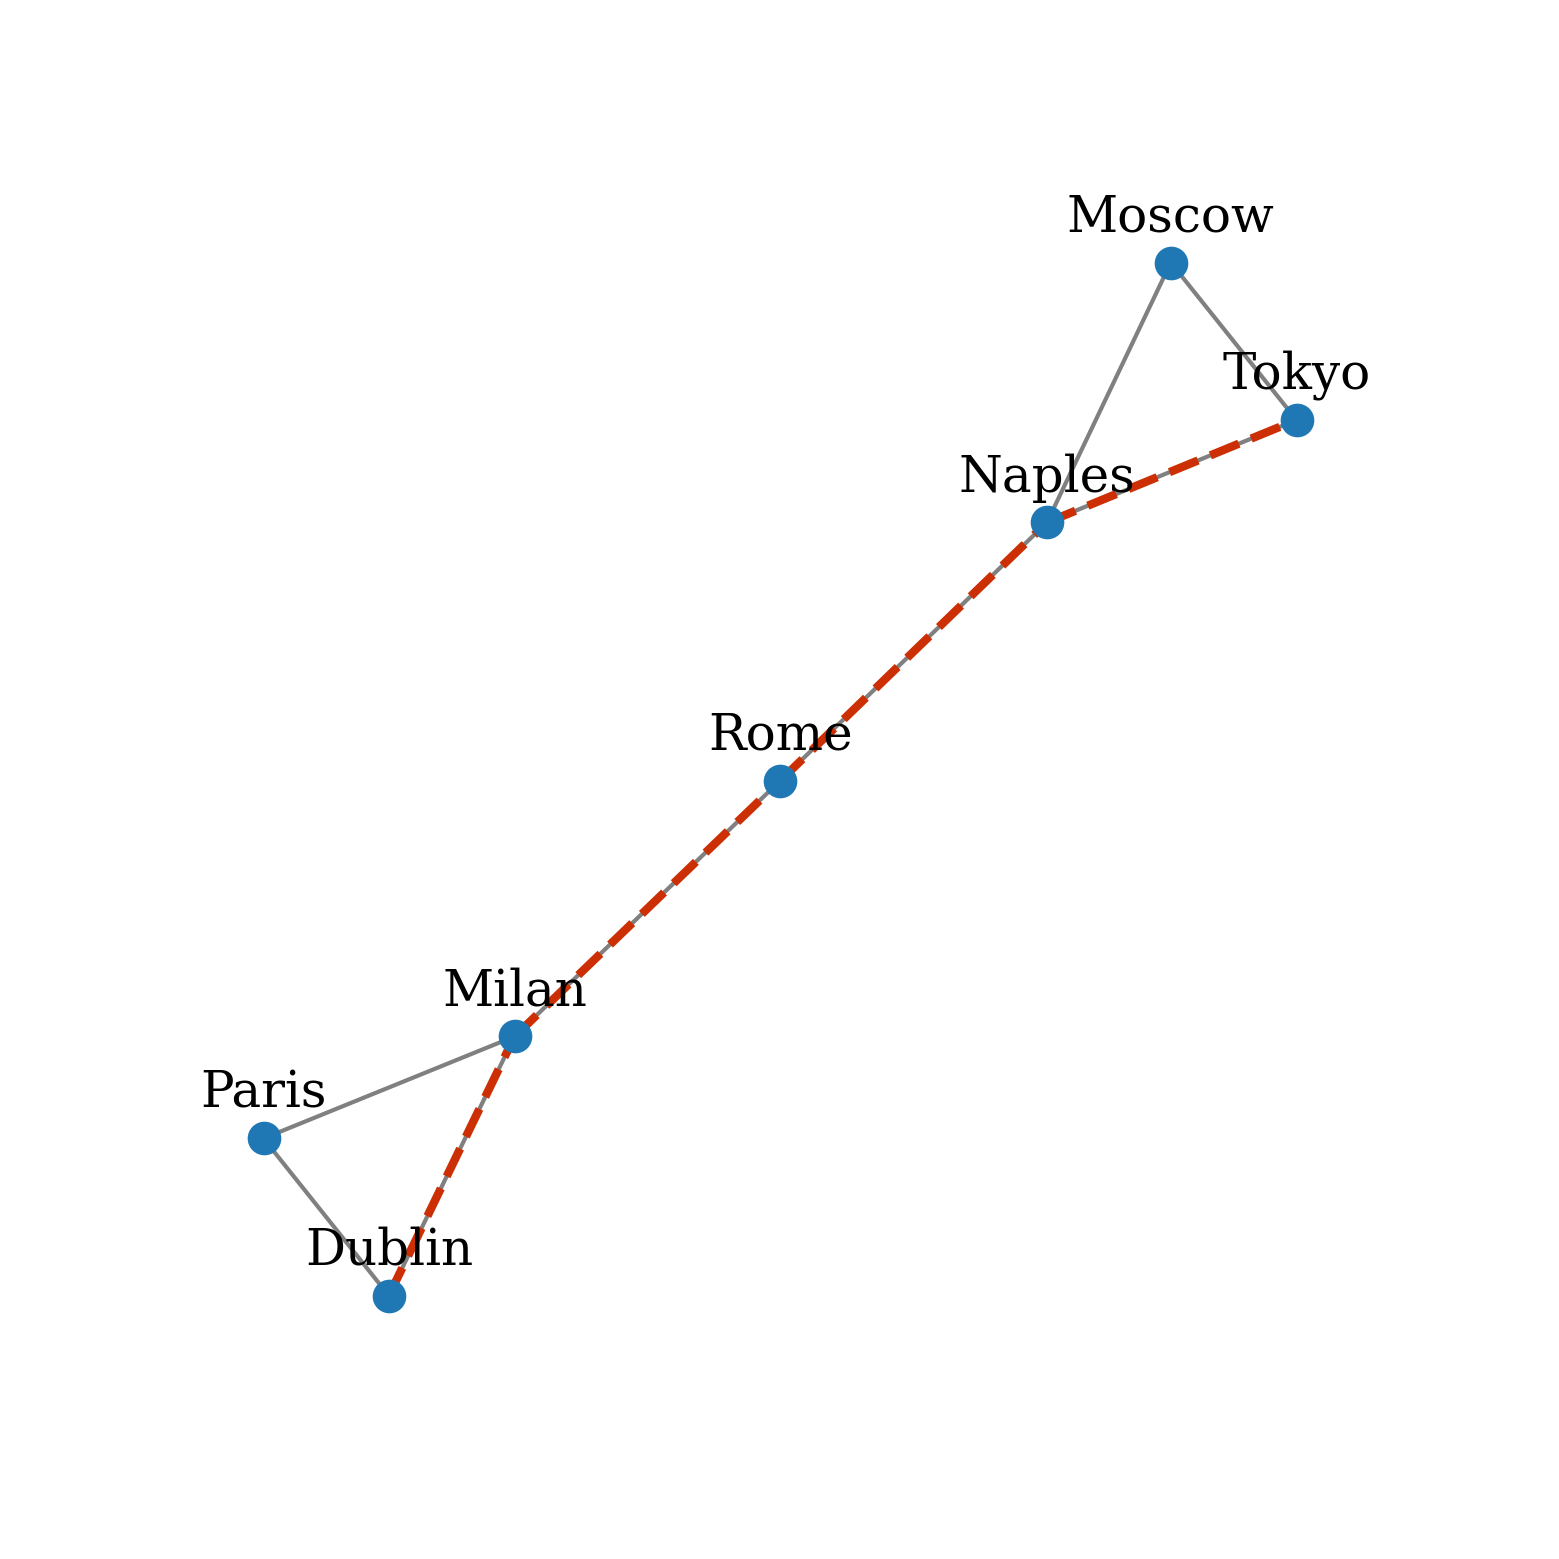

In [65]:
draw_enhanced_path(G, path, node_names=nodes,filename='shortest_path.png')

### Characteristic path lenght

In [66]:
nx.average_shortest_path_length(G)

2.1904761904761907

- Efficiency
 -특성 경로 길이(Chractetistic Path Length): 가능한 모든 노드 쌍 사이의 모든 최단경로 길이의 평균, 단 노드 연결이 끊긴 지점이 있을 경우 계산되지 않아서 Efficiency를 사용
 - Global Efficiency: 모든 노드 쌍에 대한 역최단경로 길이의 평균, 정보가 얼마나 효율적으로 교환되는지를 측정, 노드 간 연결이 끊어진 경우 효율성이 낮아짐, 노드의 근방만 고려해 계산

In [67]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

print(nx.global_efficiency(G))
print(nx.local_efficiency(G))

0.611111111111111
0.6666666666666667


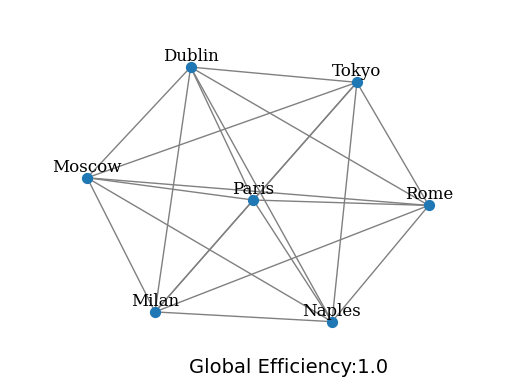

In [68]:
# higher efficiency
G = nx.complete_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

ge = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(ge), fontsize=14, ha='left', va='bottom');

draw_graph(G,node_names=nodes,filename='efficiency.png')

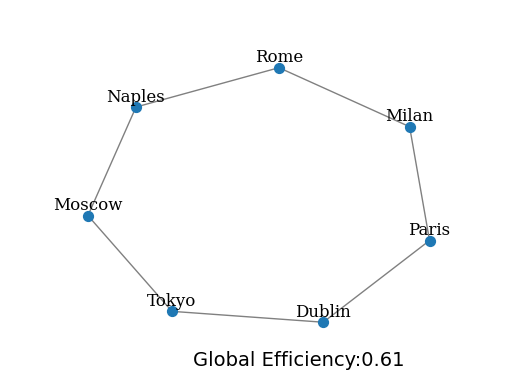

In [69]:
# lower efficiency
G = nx.cycle_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

le = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(le), fontsize=14, ha='left', va='bottom');

draw_graph(G, node_names=nodes,filename='less_efficiency.png')

- Clustering coefficient
 - segregation에 대한 측정
 - 군집계수: 얼마나 많은 노드가 함께 군집되는지를 측정

In [70]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [71]:
nx.average_clustering(G)

0.6666666666666667

In [72]:
nx.clustering(G)

{1: 1.0,
 2: 1.0,
 3: 0.3333333333333333,
 4: 0,
 5: 0.3333333333333333,
 6: 1.0,
 7: 1.0}

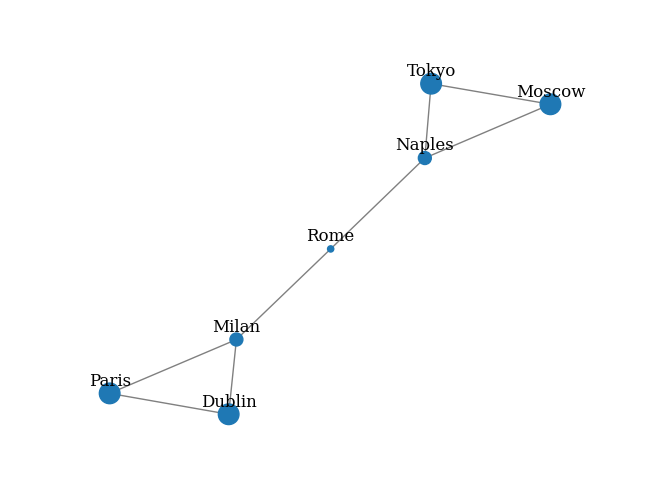

In [73]:
cc = nx.clustering(G)
node_size=[(v + 0.1) * 200 for v in cc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clustering.png')

- Centrality

In [74]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [75]:
nx.degree_centrality(G)

{1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.3333333333333333,
 5: 0.5,
 6: 0.3333333333333333,
 7: 0.3333333333333333}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Degree centrality,0.333333,0.333333,0.5,0.333333,0.5,0.333333,0.333333


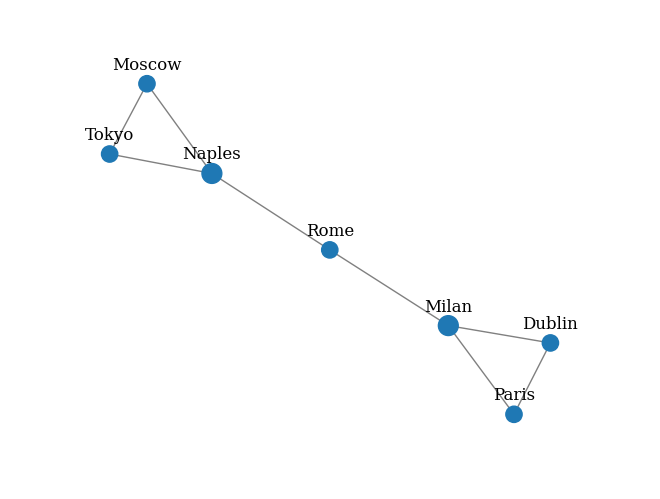

In [76]:
dc = nx.degree_centrality(G)
node_size=[(v + 0.01) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='deg_centr.png')

df = pd.DataFrame(dc,index=['Degree centrality'])
df.columns = nodes.values()
df

In [77]:
nx.closeness_centrality(G)

{1: 0.4,
 2: 0.4,
 3: 0.5454545454545454,
 4: 0.6,
 5: 0.5454545454545454,
 6: 0.4,
 7: 0.4}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Closeness centrality,0.4,0.4,0.545455,0.6,0.545455,0.4,0.4


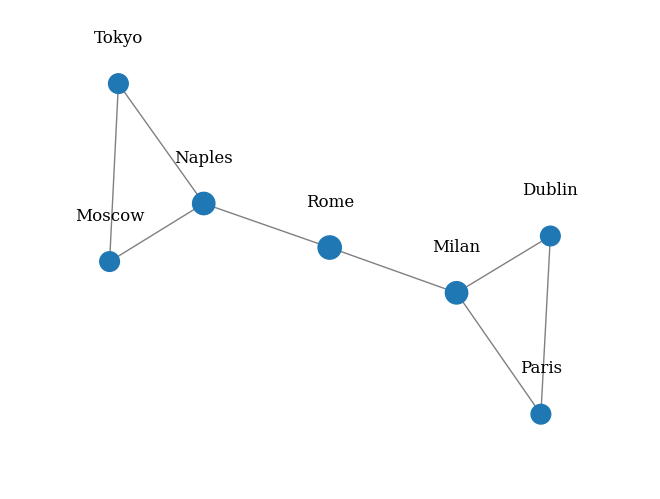

In [78]:
dc = nx.closeness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clos_centr.png')

df = pd.DataFrame(dc,index=['Closeness centrality'])
df.columns = nodes.values()
df

In [79]:
nx.betweenness_centrality(G)

{1: 0.0,
 2: 0.0,
 3: 0.5333333333333333,
 4: 0.6,
 5: 0.5333333333333333,
 6: 0.0,
 7: 0.0}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Betweenness centrality,0.0,0.0,0.533333,0.6,0.533333,0.0,0.0


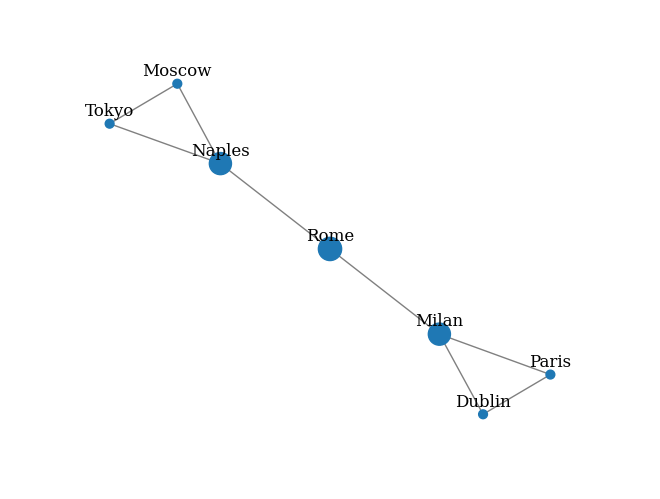

In [80]:
dc = nx.betweenness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='bet_centrality.png')

df = pd.DataFrame(dc,index=['Betweenness centrality'])
df.columns = nodes.values()
df

- Assortativity
 - 노드가 비슷한 노드에 연결되는 경향을 측정
 - 피어슨 상관계수를 사용: 직접 연결된 노드 차수 간의 피어슨 상관계수
 - 비슷한 차수를 갖는 노드 사이에 상관관계가 있을 경우 양의 상관계수, 다른 차수의 노드 사이에 상관관계가 있는 경우 음의 상관계수

In [81]:
nx.degree_pearson_correlation_coefficient(G)

-0.6

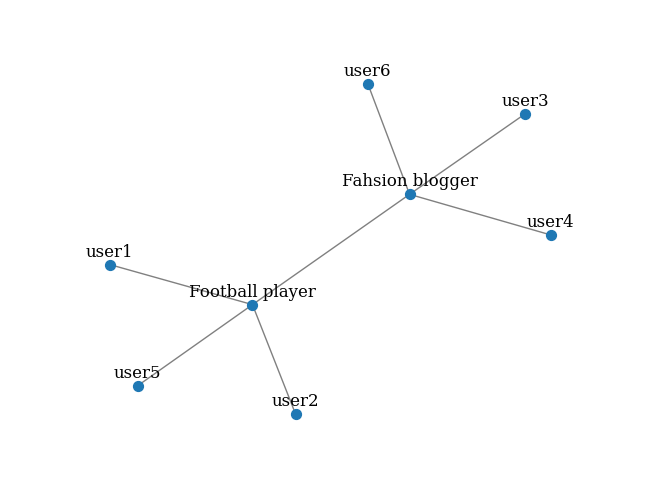

In [82]:
G = nx.Graph()
nodes = {1:'user1', 2:'user2', 3:'Football player', 4:'Fahsion blogger', 5:'user3', 6:'user4',
         7:'user5', 8:'user6'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,3),(2,3),(7,3),(3,4),(5,4),(6,4),(8,4)])

draw_graph(G, node_names=nodes,filename='assortativity.png')

In [83]:
nx.degree_pearson_correlation_coefficient(G)

-0.7500000000000001

- Modularity
 - 그래프에서 모듈화가 잘 된경우, 밀집된 연결을 보여줄 수 있음

In [84]:
import networkx.algorithms.community as nx_comm

G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

# partitions can be provided manually
print(nx_comm.modularity(G, communities=[{1,2,3,4},{5,6,7}]))

# or automatically computed using networkx
print(nx_comm.modularity(G, nx_comm.label_propagation_communities(G)))

0.3671875
0.3671875


- Transitivity
 - closed triplet의 개수를 중심으로 계산
 - 가능한 closed triplet 대비 현재의 closed triplet이 비

In [85]:
nx.transitivity(G)

0.5454545454545454

#2. 얕은 임베딩
- 행렬 분해를 이용
- 그래프 분해(Graph Factorization), 고차 근접 보존 임베딩(HOPE, Higher Order Proximity Preserved Embedding) 등을 사용

###1) 그래프 분해

 - 그래프의 인접행렬을 분해
 - 인접행렬이 대칭인 undirected graph에 적합


In [86]:
!pip install git+https://github.com/palash1992/GEM.git

  Cloning https://github.com/palash1992/GEM.git to /tmp/pip-req-build-mgii0jst
  Running command git clone --filter=blob:none --quiet https://github.com/palash1992/GEM.git /tmp/pip-req-build-mgii0jst
  Resolved https://github.com/palash1992/GEM.git to commit ae8e92d34213f5785757b4a0943bd7d8d337adb3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nxt-gem: filename=nxt_gem-2.0.1-py3-none-any.whl size=25345 sha256=8a28cb22922effbe1e20673f76a00257b696e32e4db771e470304e7d1b510842
  Stored in directory: /tmp/pip-ephem-wheel-cache-azrmeuxh/wheels/af/83/c3/fdf95e24a90730b55116c2aaf1a23ebec630b6ec8f4a763d5f
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668109 sha256=9554d587e8b57595b94e38be1ae411a18069ca2a128d7218ea7e7715217bc4ab
  Stored in directory: /root/.cache/pip/wheels/d9/e6/7d/2267d21a99e4ab8276f976f293b4ff23f50c9d809f4a216ebb
Su

In [87]:
!pip install karateclub
!pip install node2vec
!pip install --upgrade pillow

  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.7
    Uninstalling networkx-2.8.7:
      Successfully uninstalled networkx-2.8.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


  Using cached networkx-2.8.7-py3-none-any.whl (2.0 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: Operation cancelled by user


In [88]:
import networkx as nx
from gem.embedding.gf import GraphFactorization

In [89]:
G = nx.barbell_graph( m1=10, m2=4)
gf = GraphFactorization(d=2, data_set=None, max_iter=10000, eta = 1*10**-4, regu=1.0)
gf.learn_embedding(G)

./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission


array([[ 0.00471522,  0.00989905],
       [ 0.00471697,  0.00990012],
       [ 0.00471526,  0.00989965],
       [ 0.00473657,  0.00989117],
       [ 0.00472825,  0.00990949],
       [ 0.00460653,  0.00997527],
       [ 0.00465744,  0.00974378],
       [ 0.00496421,  0.01028208],
       [ 0.00591532,  0.00916762],
       [ 0.00217933,  0.0104511 ],
       [-0.00344789,  0.00525197],
       [ 0.00028298, -0.00144188],
       [ 0.00371016, -0.00270875],
       [ 0.00349774, -0.0012496 ],
       [ 0.01668077, -0.01086588],
       [ 0.01668293, -0.0108638 ],
       [ 0.01668181, -0.01086457],
       [ 0.01668442, -0.01086727],
       [ 0.01667541, -0.01079668],
       [ 0.01681352, -0.01098018],
       [ 0.01671129, -0.01064503],
       [ 0.01643821, -0.01029707],
       [ 0.01587068, -0.01371117],
       [ 0.02920481, -0.01823589]])

In [90]:
embeddings = gf.get_embedding()

### 2) 고차근접보존임베딩

- 행렬 분해 원리 사용
- undirected의 조건이 필요하지 않음

- 고차 근접성을 유지

 - 1차 근접: first order proximity, 두 노드의 직접적인 연결, 그외의 경우 1차 근접도는 0
 - 2차 및 그 이상의 고차 근접: 2단계를 통해 연결되는 관계 혹은 그 이상을 파악, 특정 노드에서 다른 노드로 2단계 이상으로 연결되는 것을 의미
 - 최종 임베딩의 차원: 2*d 차원( 2: source, target의 차원)

In [91]:
from gem.embedding.hope import HOPE
G = nx.barbell_graph(m1=10, m2 = 4)
gh = HOPE(d=4, beta = 0.01)
gf.learn_embedding(G)
embeddings = gf.get_embedding()


./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission


In [92]:
embeddings

array([[-0.00183458,  0.00376722],
       [-0.00183342,  0.0037683 ],
       [-0.0018378 ,  0.00376712],
       [-0.00180925,  0.00375821],
       [-0.00185293,  0.00384375],
       [-0.00181944,  0.00363406],
       [-0.00185152,  0.00409841],
       [-0.00163348,  0.0034186 ],
       [-0.0020447 ,  0.00319267],
       [-0.00686222,  0.00215813],
       [-0.01086391,  0.00135144],
       [-0.00999572,  0.00219874],
       [-0.01042531,  0.00266391],
       [-0.0063372 ,  0.0035589 ],
       [-0.00634943,  0.00733028],
       [-0.00634931,  0.00733188],
       [-0.00635857,  0.00732642],
       [-0.00633224,  0.00732524],
       [-0.00635779,  0.00736805],
       [-0.00638708,  0.00747776],
       [-0.00628318,  0.00689688],
       [-0.00654497,  0.00700432],
       [-0.00654875,  0.00769442],
       [-0.01174837,  0.01097285]])

In [93]:
import matplotlib.pyplot as plt

def draw_graph(G, node_names={}, node_size=500):
    pos_nodes = nx.spring_layout(G)
    nx.draw_networkx(G, pos_nodes, with_labels=True, node_size=node_size, edge_color='gray', arrowsize=30)

    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)

    #nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)

    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    plt.show()

### 3) 다양한 임베딩 방법 비교
### Graph Factorization

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:305: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


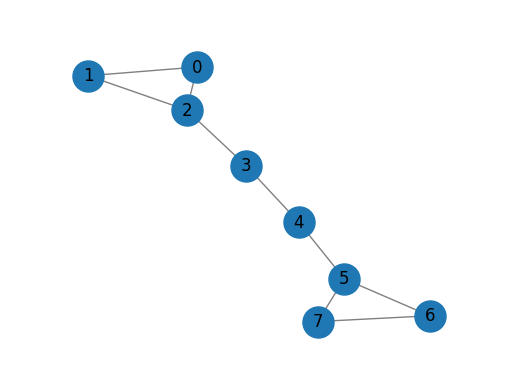

In [94]:
import networkx as nx

G = nx.barbell_graph(m1=3, m2=2)
draw_graph(G)


In [95]:
from pathlib import Path
Path("gem/intermediate").mkdir(parents=True, exist_ok=True)

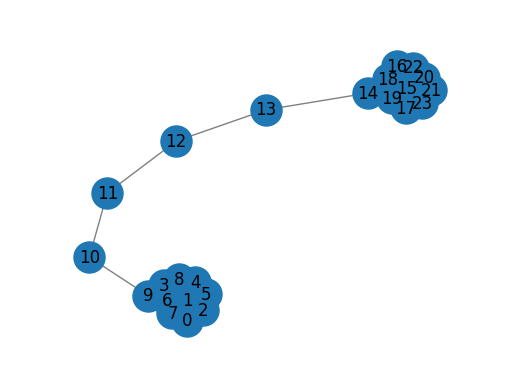

./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission


array([[-0.00547571,  0.0121373 ],
       [-0.00547768,  0.0121394 ],
       [-0.0054782 ,  0.0121342 ],
       [-0.00547234,  0.0121364 ],
       [-0.0054666 ,  0.01217685],
       [-0.00551145,  0.01204589],
       [-0.0056648 ,  0.01204642],
       [-0.00544422,  0.0123571 ],
       [-0.00578896,  0.01319589],
       [-0.00699717,  0.01494329],
       [-0.00771219,  0.00987048],
       [-0.00549425,  0.00369137],
       [-0.0034682 , -0.00296385],
       [-0.00311714,  0.00367642],
       [-0.00185335,  0.01058467],
       [-0.00185272,  0.01058117],
       [-0.00185655,  0.01058382],
       [-0.00184289,  0.01058006],
       [-0.00185948,  0.01058657],
       [-0.00180613,  0.01055056],
       [-0.00218888,  0.01052489],
       [-0.00170964,  0.01080428],
       [-0.00016884,  0.00923208],
       [-0.00135532,  0.01747316]])

In [96]:
from gem.embedding.gf import GraphFactorization

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

gf = GraphFactorization(d=2,  data_set=None,max_iter=10000, eta=1*10**-4, regu=1.0)
gf.learn_embedding(G)

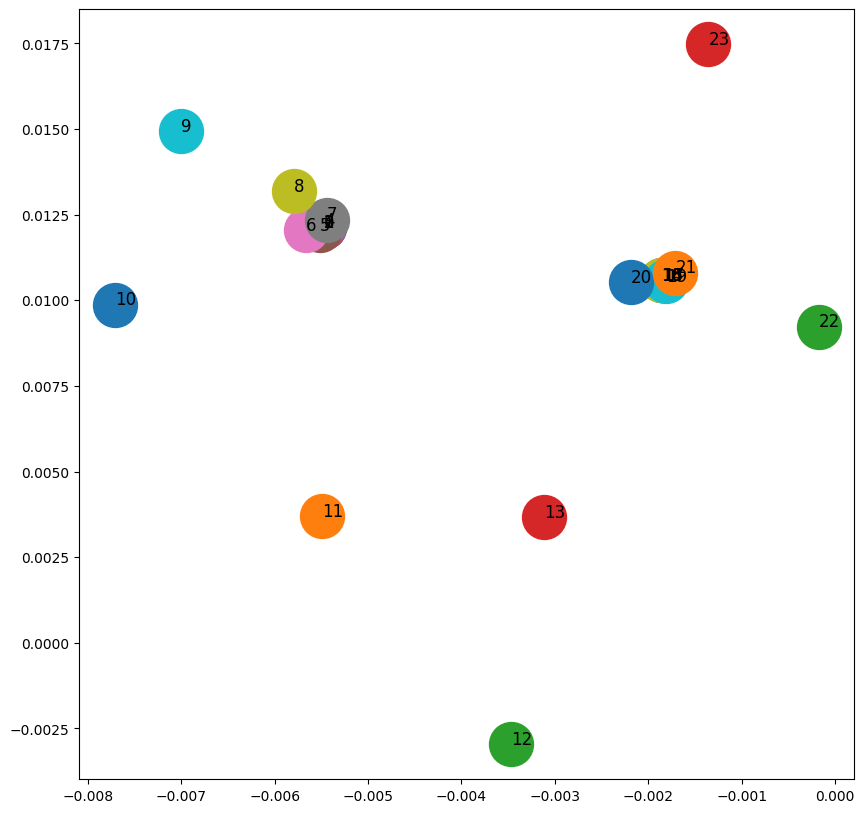

In [97]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():

    v = gf.get_embedding()[x]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

### Node2Vec
- Deep walk의 확장
- Deep walk 대비, 그래프에 편향된 랜덤 패스를 생성, 그래프의 지역 구조와 전역 커뮤니티 구조 보존

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:305: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


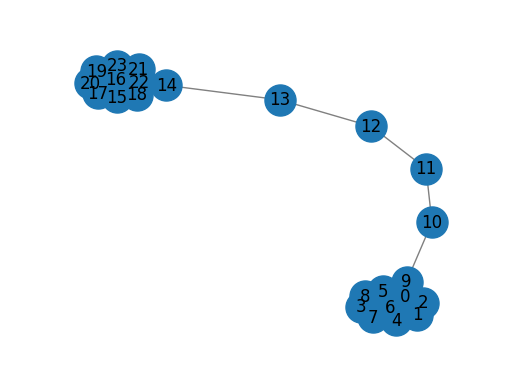

Computing transition probabilities:   0%|          | 0/24 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 88.36it/s]


In [98]:
import networkx as nx
from node2vec import Node2Vec

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

node2vec = Node2Vec(G, dimensions=2)
model = node2vec.fit(window=10)
embeddings = model.wv

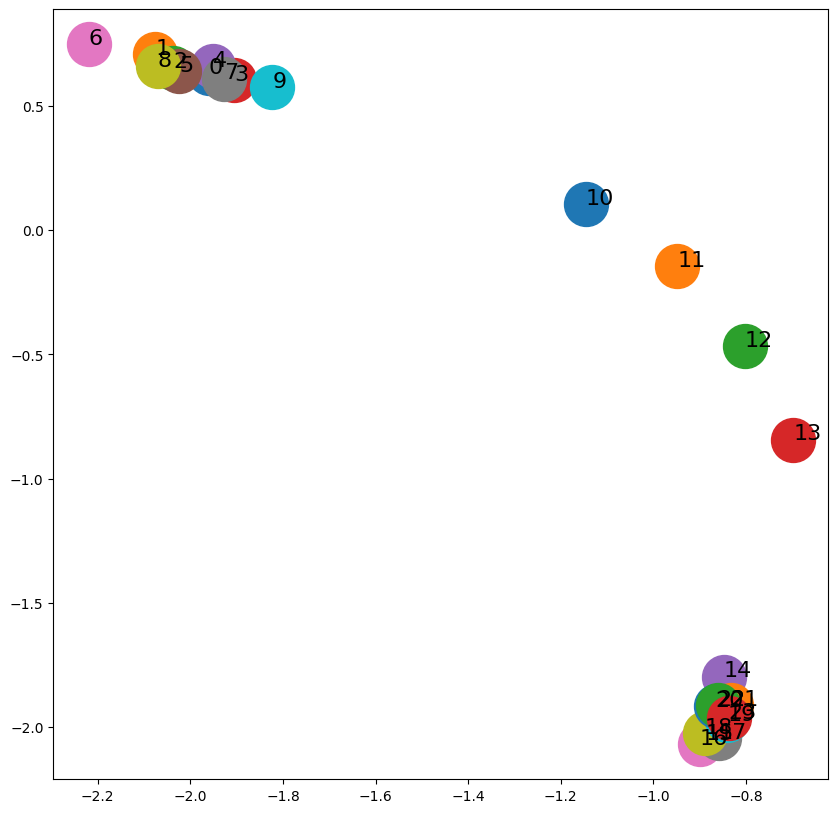

In [99]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():

    v = model.wv[str(x)]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

### Edge2Vec
- 엣지에 대한 임베딩!
- 인접한 두 노드의 노드 임베딩을 사용, 엣지의 임베딩을 추출
- 아다마르 임베딩 기법 사용

In [100]:
from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

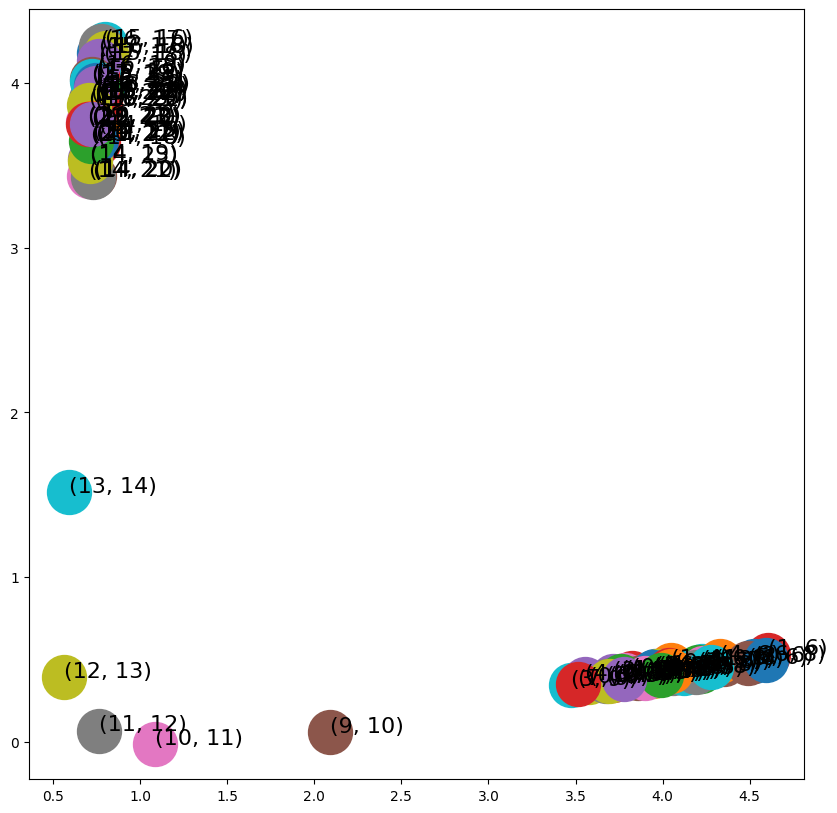

In [101]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.edges():

    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

### Graph2Vec
- 주어진 그래프의 각 노드에 대한 임베딩
- 각 노드 및 노드가 속한 그래프를 같이 고려
- Doc2Vec의 응용
 - 전체 그래프가 Document의 역할
 - 각 노드의 자아 그래프로 생성된 하위 그래프를 Doc2Vec의 단어로 고려
 - 각 문서가 문장으로 구성되었듯이, 그래프가 하위 그래프로 구성된 구조를 고려함

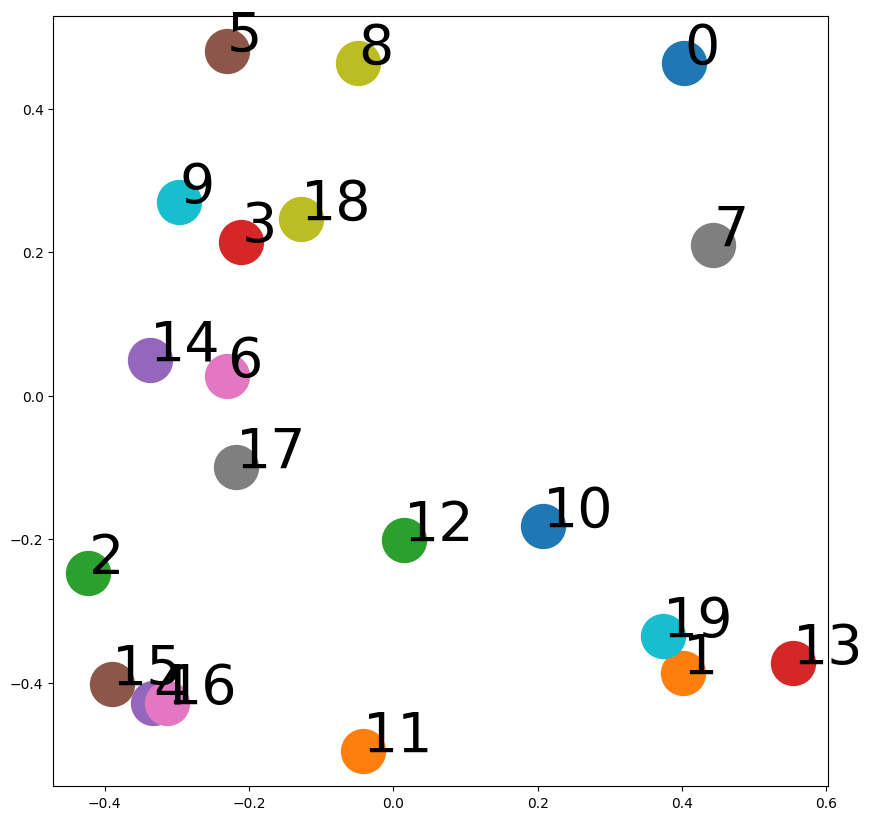

In [102]:
import random
import matplotlib.pyplot as plt
from karateclub import Graph2Vec

n_graphs = 20

def generate_radom():
    n = random.randint(6, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n,k,p), [n,k,p]

Gs = [generate_radom() for x in range(n_graphs)]

model = Graph2Vec(dimensions=2, wl_iterations=10)
model.fit([x[0] for x in Gs])
embeddings = model.get_embedding()

fig, ax = plt.subplots(figsize=(10,10))

for i,vec in enumerate(embeddings):

    ax.scatter(vec[0],vec[1], s=1000)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=40)

# 3. Embedding based Applications

- https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz
- https://temprl.com/cora.tgz

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:305: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


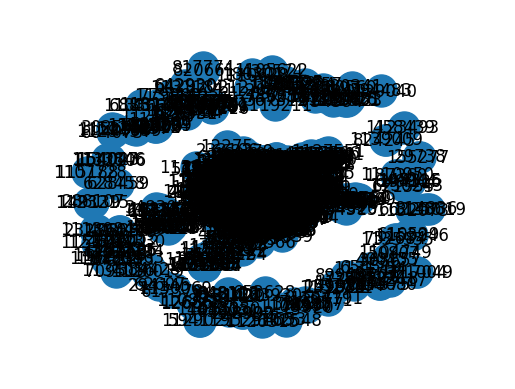

In [103]:
import networkx as nx
import pandas as pd

edgelist = pd.read_csv("cora.cites", sep='\t', header=None, names=["target", "source"])
G = nx.from_pandas_edgelist(edgelist)
draw_graph(G)

In [104]:
from node2vec import Node2Vec
from node2vec.edges import HadamardEmbedder

node2vec = Node2Vec(G)
model = node2vec.fit()
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:13<00:00,  1.34s/it]


In [105]:
embeddings = [edges_embs[str(x[0]),str(x[1])] for x in G.edges]

In [106]:
papers = pd.read_csv("cora.content", sep="\t", header=None,
                     names=["paper_id"] + [f"term_{idx}" for idx in range(1433)] + ["subject"] )

In [107]:
papers

,paper_id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,term_8,...,term_1424,term_1425,term_1426,term_1427,term_1428,term_1429,term_1430,term_1431,term_1432,subject
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,1128975,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2704,1128977,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2705,1128978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2706,117328,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Case_Based


In [108]:
papers[papers.paper_id == 31336].subject.values

array(['Neural_Networks'], dtype=object)

In [109]:
[G.get_edge_data(str(x[0]),str(x[1])) for x in G.edges]

labels = [  papers[ papers.paper_id == x[0]].subject.values == papers[ papers.paper_id == x[1]].subject.values for x in G.edges ]

In [110]:
G.edges.data()

EdgeDataView([(1033, 35, {}), (1033, 1034, {}), (1033, 1107062, {}), (1033, 41714, {}), (1033, 45605, {}), (35, 103482, {}), (35, 103515, {}), (35, 1050679, {}), (35, 1103960, {}), (35, 1103985, {}), (35, 1109199, {}), (35, 1112911, {}), (35, 1113438, {}), (35, 1113831, {}), (35, 1114331, {}), (35, 1117476, {}), (35, 1119505, {}), (35, 1119708, {}), (35, 1120431, {}), (35, 1123756, {}), (35, 1125386, {}), (35, 1127430, {}), (35, 1127913, {}), (35, 1128204, {}), (35, 1128227, {}), (35, 1128314, {}), (35, 1128453, {}), (35, 1128945, {}), (35, 1128959, {}), (35, 1128985, {}), (35, 1129018, {}), (35, 1129027, {}), (35, 1129573, {}), (35, 1129683, {}), (35, 1129778, {}), (35, 1130847, {}), (35, 1130856, {}), (35, 1131116, {}), (35, 1131360, {}), (35, 1131557, {}), (35, 1131752, {}), (35, 1133196, {}), (35, 1133338, {}), (35, 1136814, {}), (35, 1137466, {}), (35, 1152421, {}), (35, 1152508, {}), (35, 1153065, {}), (35, 1153280, {}), (35, 1153577, {}), (35, 1153853, {}), (35, 1153943, {}), (3

In [111]:
len(labels)
labels

[array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([False]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([False]),
 array([ True]),
 array([False]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([False]

In [112]:
embeddings[0].shape
len(embeddings)

5278

In [113]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(embeddings, labels);

<ipython-input-113-c132125a5f30>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(embeddings, labels);


In [114]:
from sklearn import metrics

y_pred = rf.predict(embeddings)

print('Precision:', metrics.precision_score(labels, y_pred))
print('Recall:', metrics.recall_score(labels, y_pred))
print('F1-Score:', metrics.f1_score(labels, y_pred))

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


### 4) 네트워크 데이터 저장소
http://networkrepository.com

- mtx 파일: : matrix market exchange format



In [ ]:
from scipy.io import mmread
adj_matrix = mmread("파일명.mtx")
graph = nx.from_scipy_sparse_matrix(adj_matrix)



https://snap.stanford.edu/index.html

- edgelist를 txt로 제공

In [ ]:
g = nx.read_edgelist( "파일명.txt")
